#Imports & Data & PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
import sklearn.decomposition

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

X_sub = X_train[:1000,:]
sub_labels = train_labels[:1000]

col_means = np.mean(X_train, axis = 0)
X_tilda = X_train - col_means
X_test_centered = X_test - col_means

In [ ]:
k=187
PCA = sklearn.decomposition.PCA(n_components = k)
PCA.fit(X_tilda)
Y_train = PCA.transform(X_tilda)
Y_test = PCA.transform(X_test_centered)

Y_test.shape


(10000, 187)

#LDA

In [ ]:
for i in range(10):
    exec('%s=%d' % ('M'+str(i),0))
    globals()['M'+str(i)] = np.mean(Y_train[train_labels==i,:],axis=0).reshape(187,1)
m=np.mean(Y_train,axis=0).reshape(187,1)

M0.shape
Sw = np.zeros([187,187])
for i in range(Y_train.shape[0]):
    x = Y_train[i,:].reshape(187,1)
    mj = (globals()['M' +str(train_labels[i])]).reshape(187,1)
    Sw+=(x-mj).dot((x-mj).T)

Sb = np.zeros([187,187])
for i in range(10):
    mj = globals()['M'+str(i)]
    Sb += 6000*(mj - m).dot((mj-m).T)


In [ ]:
eigvals, eigvecs = np.linalg.eig( np.linalg.inv(Sw).dot(Sb) ) #I don't think this worked correctly
#it only returned 1 non-zero eigen value
V = np.real(eigvecs[:,:9]) #only getting the top 1 dimension
Z_train = Y_train.dot(V)
Z_test = Y_test.dot(V)

In [ ]:
acc = []
for k in range(1,13):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(Z_train, train_labels)
    y_preds = model.predict(Z_test)
    score=accuracy_score(y_true=test_labels, y_pred=y_preds)
    print('K is:',k,'\n acc is:', score)
    acc.append(score)

K is: 1 
 acc is: 0.7939
K is: 2 
 acc is: 0.7973
K is: 3 
 acc is: 0.8169
K is: 4 
 acc is: 0.822
K is: 5 
 acc is: 0.8259
K is: 6 
 acc is: 0.8289
K is: 7 
 acc is: 0.8316
K is: 8 
 acc is: 0.8325
K is: 9 
 acc is: 0.8314
K is: 10 
 acc is: 0.8316
K is: 11 
 acc is: 0.8315
K is: 12 
 acc is: 0.8311


Text(0, 0.5, 'Percent Error')

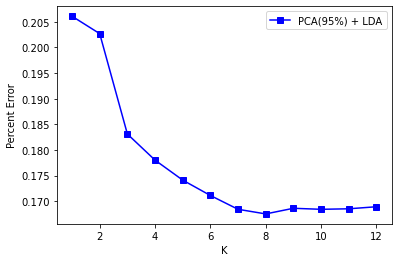

In [ ]:
acc = [0.7939, 0.7973, 0.8169, 0.822, 0.8259, 0.8289,
       0.8316, 0.8325, 0.8314, 0.8316, 0.8315, 0.8311]

error = 1-np.array(acc)

#plots
plt.plot(range(1,13), error, '-bs', label='PCA(95%) + LDA')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

Text(0, 0.5, 'Percent Error')

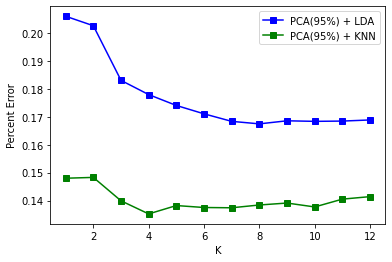

In [ ]:
#Accuracy for PCA(95%) + LDA
acc = [0.7939, 0.7973, 0.8169, 0.822, 0.8259, 0.8289,
       0.8316, 0.8325, 0.8314, 0.8316, 0.8315, 0.8311]

#KNN Accuracy with PCA(95%) + KNN from Q1
accKNN=[0.852,0.8517,0.8601,0.8648,0.8618,0.8625,
        0.8626,0.8616,0.8609,0.8623,0.8595,0.8586]

error = 1-np.array(acc)
errorKNN = 1-np.array(accKNN)

#plots
plt.plot(range(1,13), error, '-bs', label='PCA(95%) + LDA')
plt.plot(range(1,13), errorKNN, '-gs', label='PCA(95%) + KNN')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')